In [3]:
#from settings import BASE_DIR
import pandas as pd
import seaborn as sns
import json

from importlib.machinery import SourceFileLoader
foo = SourceFileLoader("settings",
                       "C:\\Users\\biagi\\Desktop\\university\\Second Year\\First Semester\\advanced machine learning\\prog\\Advanced_Machine_Learning_Project\\settings.py").load_module()
from settings import BASE_DIR

df = pd.read_csv(
    "{BaseDir}/Advanced_Machine_Learning_Project/ML/RandomSearchModelsResult.csv".format(BaseDir=BASE_DIR)
)
#df2 = pd.read_csv(
#    "{BaseDir}/Advanced_Machine_Learning_Project/ML/ModelResultsAnna.csv".format(BaseDir=BASE_DIR)
#)

#df2[["Model", "Mean_fit_time", "Mean_score_time"]] = df2[["model", "mean_fit_time", "mean_score_time"]]
#df2 = df2.drop(["model", "mean_fit_time", "mean_score_time"], axis=1)

#frames = [df1, df2]
#df = pd.concat(frames)
df[["embedding", "Model"]] = df.Model.str.split('(TFIDF|W2V)', expand=True).drop(0,axis=1)

C:\Users\biagi\Desktop\university\Second Year\First Semester\advanced machine learning\prog


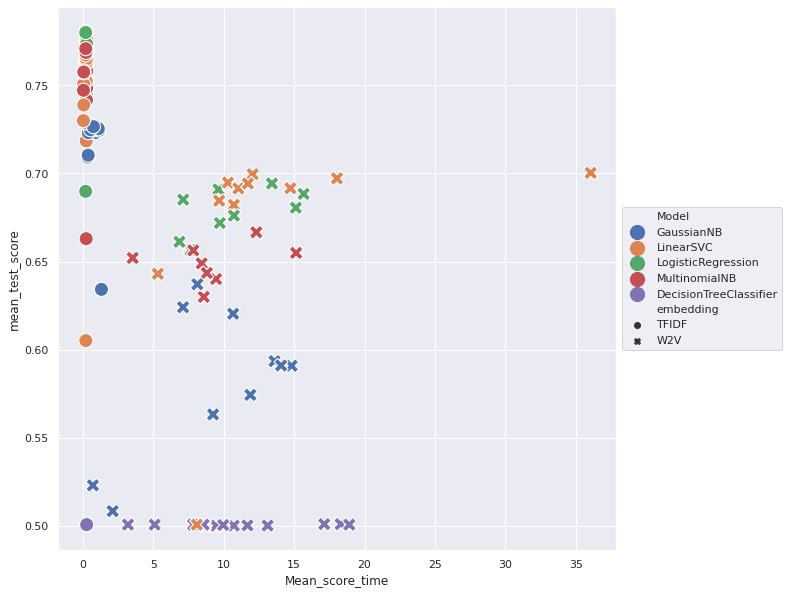

In [2]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df,
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

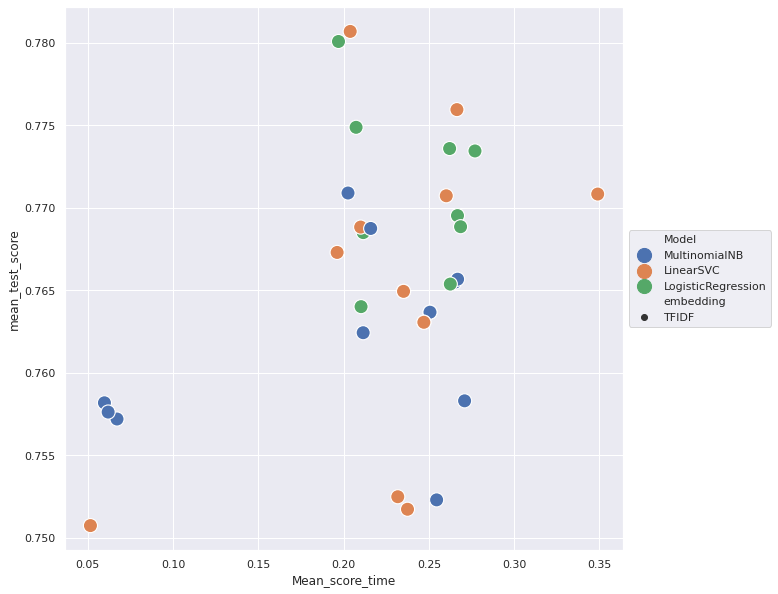

In [3]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df.query('mean_test_score > 0.75'),
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

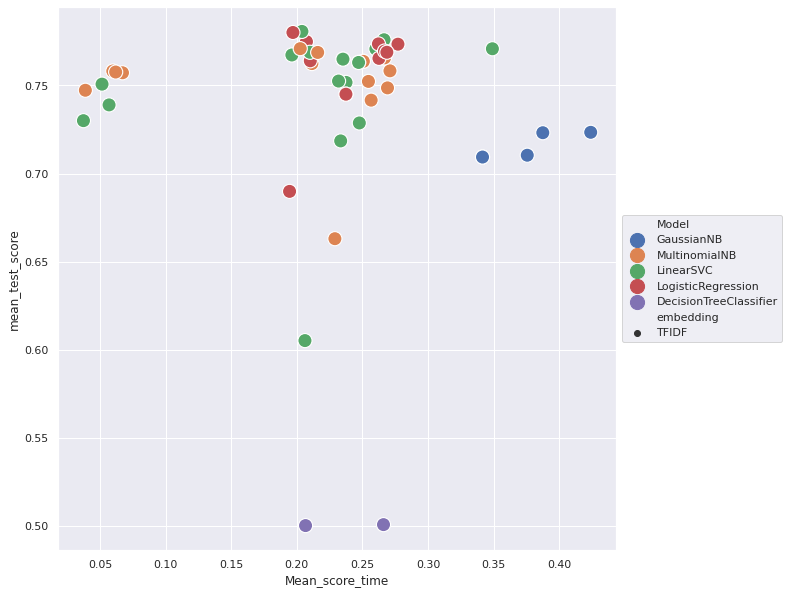

In [4]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df.query('Mean_score_time < 0.5'),
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

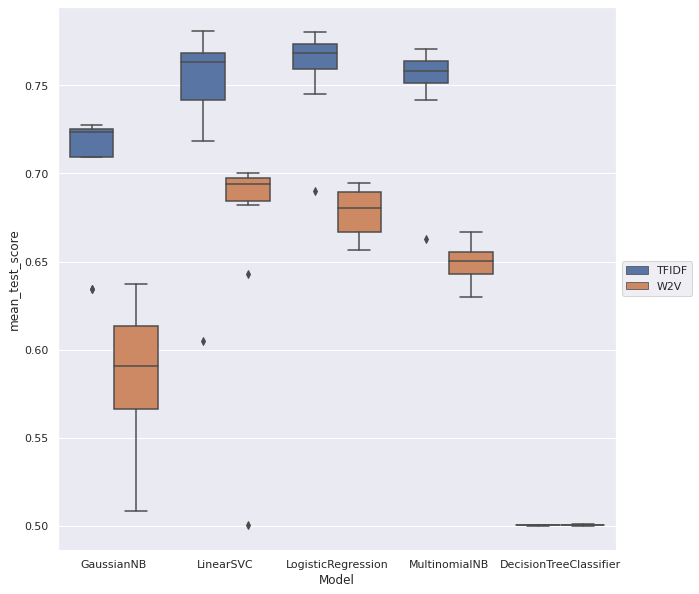

In [5]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='Model', y='mean_test_score', data=df, hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

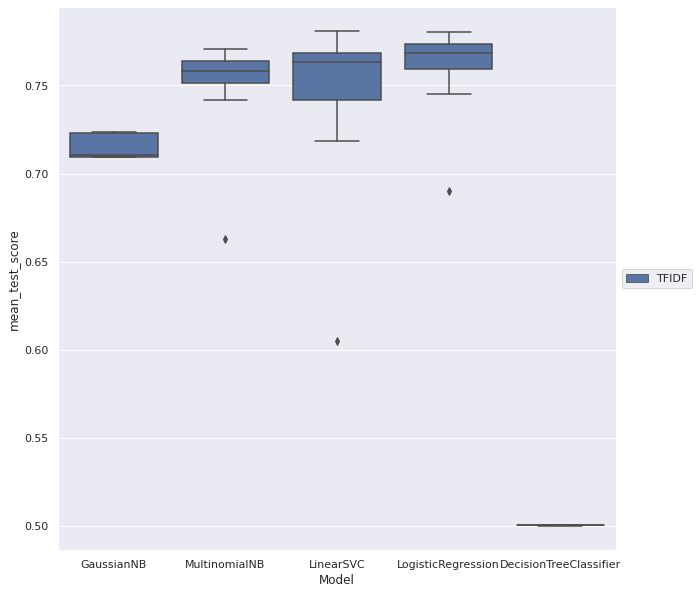

In [6]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='Model', y='mean_test_score', data=df.query('Mean_score_time < 0.5'), hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [4]:
df.query("Model == 'MultinomialNB' and embedding == 'TFIDF'")[["Mean_score_time", "mean_test_score"]]

,Mean_score_time,mean_test_score
3,0.250669,0.763663
7,0.250669,0.763663
12,0.270958,0.758295
21,0.211476,0.762421
41,0.228996,0.662989
46,0.265138,0.765474
53,0.266853,0.765663
55,0.254560,0.752295
58,0.269085,0.748611
60,0.256623,0.741642


In [38]:
def load_configs(interested_model=None):
    x = open("{BaseDir}/Advanced_Machine_Learning_Project/ML/RandomSearchModelParams.json".format(BaseDir=BASE_DIR), 'r').read().replace("\n","").replace("\t"," ").split('}',)
    x = [y+'}' for y in x]
    jsons = [json.loads(y) for y in x[:-1]]
    if interested_model != None:
        jsons = [json for json in jsons if json["model"] == interested_model]
    jsons = pd.DataFrame(jsons)
    return jsons

In [39]:
model_params = load_configs("TFIDFLogisticRegression")

In [40]:
model_params[["Mean_score_time", "mean_test_score"]] = df.query("Model == 'LogisticRegression' and embedding == 'TFIDF'").reset_index()[["Mean_score_time", "mean_test_score"]]

In [43]:
model_params

,model,model__C,model__fit_intercept,model__l1_ratio,model__max_iter,model__ngram_range,model__penalty,model__solver,model__tfidf_max_features,model__tol,Mean_score_time,mean_test_score
0,TFIDFLogisticRegression,0.630903,False,0.815321,352,"[1, 2]",l2,saga,607,0.000649,0.237413,0.745032
1,TFIDFLogisticRegression,0.630903,False,0.815321,352,"[1, 2]",l2,saga,607,0.000649,0.237413,0.745032
2,TFIDFLogisticRegression,1.257473,True,0.445614,764,"[1, 2]",elasticnet,saga,3811,0.000259,0.207327,0.774863
3,TFIDFLogisticRegression,0.406877,False,0.025507,307,"[1, 2]",l1,saga,4182,0.000669,0.211519,0.768484
4,TFIDFLogisticRegression,1.199537,True,0.366018,205,"[1, 2]",none,saga,2643,0.000284,0.210247,0.764000
5,TFIDFLogisticRegression,0.144292,True,0.804988,760,"[1, 2]",none,saga,127,0.000258,0.194463,0.689853
6,TFIDFLogisticRegression,0.697742,True,0.564080,221,"[1, 2]",l1,saga,2627,0.000174,0.277047,0.773432
7,TFIDFLogisticRegression,1.578293,False,0.710499,107,"[1, 2]",l2,saga,1837,0.000081,0.262564,0.765368
8,TFIDFLogisticRegression,1.131345,True,0.827685,567,"[1, 2]",elasticnet,saga,2598,0.000854,0.262172,0.773579
9,TFIDFLogisticRegression,0.670516,False,0.623418,507,"[1, 2]",l2,saga,2279,0.000023,0.266793,0.769516


In [35]:
from pandas_profiling import ProfileReport
ProfileReport(params)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
model_params = load_configs("TFIDFMultinomialNB")
model_params[["Mean_score_time", "mean_test_score"]] = df.query("Model == 'MultinomialNB' and embedding == 'TFIDF'").reset_index()[["Mean_score_time", "mean_test_score"]]
ProfileReport(model_params)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]